### Basic EDA

In [83]:
# Total Number of Samples, Number of Rows in Training Data, Number of Rows in Validation Data
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the data
train_data = pd.read_csv('titanic_train.csv')

# Display the first few rows of the train dataset and check for missing values
train_data.info(), train_data.head(), train_data.isnull().sum()

# Split the data into training and validation sets (80% train, 20% validation)
train_set, val_set = train_test_split(train_data, test_size=0.2, random_state=42)

# Display the number of rows in each set
print(f"Number of rows in Training Data: {len(train_set)}")
print(f"Number of rows in Validation Data: {len(val_set)}")

# Generate Data Dictionary
data_dictionary = pd.DataFrame({
    'Column Name': train_data.columns,
    'Modeling Role': ['Identifier' if col == 'PassengerId' else 'Feature' for col in train_data.columns],
    'Measurement Level': [
        'Nominal' if col in ['PassengerId', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'] 
        else 'Ordinal' if col == 'Pclass' 
        else 'Binary' if col == 'Survived' 
        else 'Continuous'
        for col in train_data.columns
    ],
    'Description': [
        'Unique ID for each passenger' if col == 'PassengerId' else
        '1 if the passenger survived, 0 otherwise' if col == 'Survived' else
        'Passenger class (1st, 2nd, 3rd)' if col == 'Pclass' else
        'Name of the passenger' if col == 'Name' else
        'Gender of the passenger (Male/Female)' if col == 'Sex' else
        'Age of the passenger' if col == 'Age' else
        'Number of siblings/spouses aboard' if col == 'SibSp' else
        'Number of parents/children aboard' if col == 'Parch' else
        'Ticket number' if col == 'Ticket' else
        'Fare paid by the passenger' if col == 'Fare' else
        'Cabin number' if col == 'Cabin' else
        'Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)' if col == 'Embarked' else ''
        for col in train_data.columns
    ]
})

# Display the Data Dictionary
print(data_dictionary)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
Number of rows in Training Data: 712
Number of rows in Validation Data: 179
    Column Name Modeling Role Measurement Level  \
0   PassengerId    Identifier           Nominal   
1      Survived       Feature            Binary   
2        Pclass

In [ ]:
# Total Number of Samples is 891, Number of Rows in Training Data is 712, Number of Rows in Validation Data is 179

### Data prep and fit model

In [43]:
# Model Details
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Load the dataset
train_data = pd.read_csv('titanic_train.csv')
test_data = pd.read_csv('titanic_test.csv')

# Select feature columns and target
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
target = 'Survived'

# Preprocessing (Handling missing values and encoding categorical variables)
train_data['Age'].fillna(train_data['Age'].median(), inplace=False)
train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace=False)
test_data['Age'].fillna(test_data['Age'].median(), inplace=False)
test_data['Embarked'].fillna(test_data['Embarked'].mode()[0], inplace=False)

# Apply loc to avoid chained assignment warnings
train_data.loc[:, 'Age'] = train_data['Age'].fillna(train_data['Age'].median())
train_data.loc[:, 'Embarked'] = train_data['Embarked'].fillna(train_data['Embarked'].mode()[0])
test_data.loc[:, 'Age'] = test_data['Age'].fillna(test_data['Age'].median())
test_data.loc[:, 'Embarked'] = test_data['Embarked'].fillna(test_data['Embarked'].mode()[0])
test_data.loc[:, 'Fare'] = test_data['Fare'].fillna(test_data['Fare'].mode()[0])

# Encode categorical variables 'Sex' and 'Embarked' using pd.get_dummies
train_data_encoded = pd.get_dummies(train_data, columns=['Sex', 'Embarked'], drop_first=True)
test_data_encoded = pd.get_dummies(test_data, columns=['Sex', 'Embarked'], drop_first=True)

# Update the features list to include the new encoded column names
encoded_features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male', 'Embarked_Q', 'Embarked_S']

# Split the data into training and validation sets
X = train_data_encoded[encoded_features]
y = train_data_encoded[target]
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Logistic Regression model and increase max_iter
model = LogisticRegression(solver='lbfgs', max_iter=500)  # Increased max_iter to avoid convergence warning

# Fit the model
model.fit(X_train, y_train)

# Output model details
print(f"Features used in the model: {encoded_features}")
print(f"Target column: {target}")
print(f"Model type: Logistic Regression")
print(f"Hyperparameters: Solver = {model.solver}, Max iterations = {model.max_iter}, C = {model.C}")
print(f"Software used: scikit-learn {model.__module__}")


Features used in the model: ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male', 'Embarked_Q', 'Embarked_S']
Target column: Survived
Model type: Logistic Regression
Hyperparameters: Solver = lbfgs, Max iterations = 500, C = 1.0
Software used: scikit-learn sklearn.linear_model._logistic


In [75]:
# test_data_encoded.isnull().any()

### Assess model performance

In [63]:
y_train_pred = model.predict(X_train[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male', 'Embarked_Q', 'Embarked_S']])
y_val_pred = model.predict(X_val[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male', 'Embarked_Q', 'Embarked_S']])
train_auc = roc_auc_score(y_train, y_train_pred)
valid_auc = roc_auc_score(y_val, y_val_pred)
print(train_auc)
print(valid_auc)

# test from Kaggle: 0.76315

0.7787078122899019
0.8001930501930502


### Generate Kaggle submission file 

In [67]:
submit = pd.DataFrame(columns=['PassengerId', 'Survived'])
submit['PassengerId'] = test_data_encoded['PassengerId']
submit['Survived'] = model.predict(test_data_encoded[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male', 'Embarked_Q', 'Embarked_S']])
submit.to_csv('C:\\Users\\nmemr\\OneDrive\\Desktop\\submit.csv', index=False)
submit

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


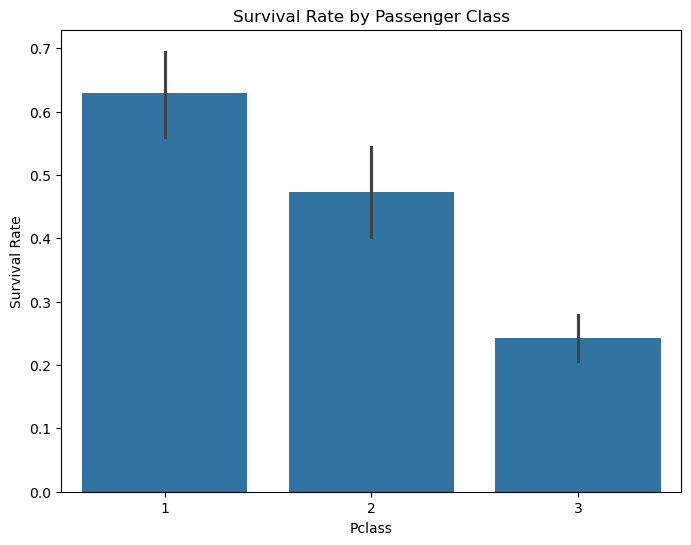

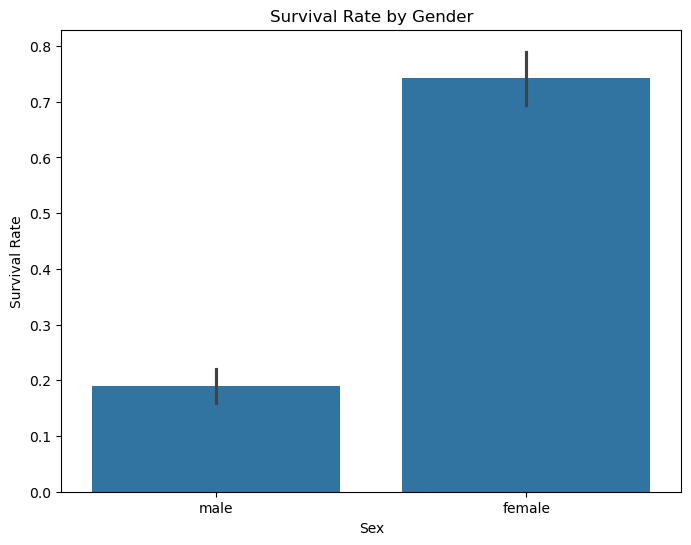

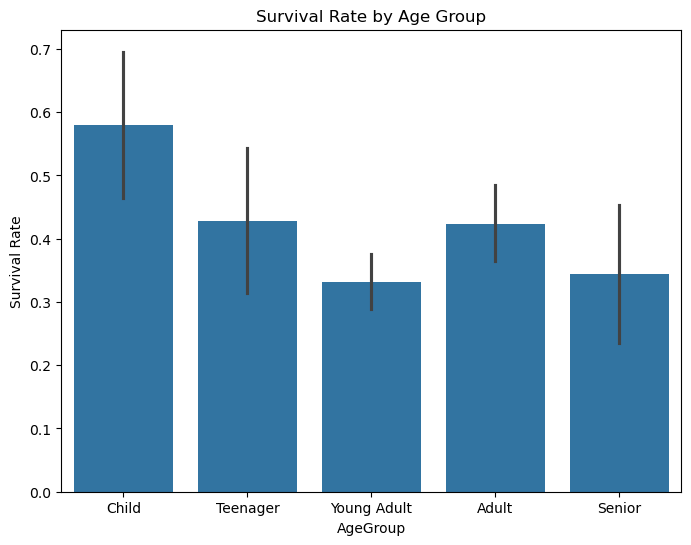

In [77]:
# Plot of survival rate by passenger's class, gender and age groups
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting survival rate by Pclass
plt.figure(figsize=(8, 6))
sns.barplot(x='Pclass', y='Survived', data=train_data)
plt.title('Survival Rate by Passenger Class')
plt.ylabel('Survival Rate')
plt.show()

# Plotting survival rate by Sex
plt.figure(figsize=(8, 6))
sns.barplot(x='Sex', y='Survived', data=train_data)
plt.title('Survival Rate by Gender')
plt.ylabel('Survival Rate')
plt.show()

# Creating age groups to plot survival rate by age
train_data['AgeGroup'] = pd.cut(train_data['Age'], bins=[0, 12, 18, 30, 50, 80], labels=['Child', 'Teenager', 'Young Adult', 'Adult', 'Senior'])

# Plotting survival rate by AgeGroup
plt.figure(figsize=(8, 6))
sns.barplot(x='AgeGroup', y='Survived', data=train_data)
plt.title('Survival Rate by Age Group')
plt.ylabel('Survival Rate')
plt.show()

In [ ]:
# Passengers in 1st class had the highest survival rate, followed by those in 2nd class. 3rd class passengers had the lowest survival rate.
# Females had a significantly higher survival rate than males, aligning with the negative coefficient for the "Sex" feature in the logistic regression model.
# Children (ages 0-12) had the highest survival rate, while seniors (ages 50-80) had the lowest. Young adults and adults had relatively similar survival rates, though slightly lower than children.